In [15]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install ipywidgets

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ipywidgets as widgets
from IPython.display import display

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU

In [19]:
# Crear un menú desplegable con las opciones de las empresas
dropdown = widgets.Dropdown(
    options=[
        ('Apple (AAPL)', 'AAPL'),
        ('Microsoft (MSFT)', 'MSFT'),
        ('Amazon (AMZN)', 'AMZN'),
        ('Google (GOOG)', 'GOOG'),
        ('Facebook (FB)', 'FB'),
        ('Tesla (TSLA)', 'TSLA'),
        ('Nvidia (NVDA)', 'NVDA')
    ],
    description='Empresa:',
    value='AAPL'  # Valor predeterminado (debe coincidir con una opción válida)
)

# Variable 'company' para almacenar la empresa seleccionada
company = None

# Función que se llama al cambiar la selección
def on_select(change):
    global company
    company = change['new']  # Asigna el ticker correspondiente
    print(f"Has seleccionado la empresa con el ticker: {company}")

# Conectar el evento de cambio de selección
dropdown.observe(on_select, names='value')

# Mostrar el menú desplegable
display(dropdown)


Dropdown(description='Empresa:', options=(('Apple (AAPL)', 'AAPL'), ('Microsoft (MSFT)', 'MSFT'), ('Amazon (AM…

Has seleccionado la empresa con el ticker: GOOG
Has seleccionado la empresa con el ticker: AAPL


In [27]:
#cargar datos
ticker = yf.Ticker(company)
hist = ticker.history(start = '2012-1-1', end='2020-1-1')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,12.347437,12.440932,12.335373,12.402629,302220800,0.0,0.0
2012-01-04 00:00:00-05:00,12.365528,12.506676,12.343813,12.469277,260022000,0.0,0.0
2012-01-05 00:00:00-05:00,12.514823,12.623397,12.446057,12.607715,271269600,0.0,0.0
2012-01-06 00:00:00-05:00,12.660193,12.750069,12.643605,12.739513,318292800,0.0,0.0
2012-01-09 00:00:00-05:00,12.833008,12.900867,12.707844,12.719305,394024400,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,69.076413,69.124944,68.646948,68.974503,48478800,0.0,0.0
2019-12-26 00:00:00-05:00,69.107964,70.359973,69.078849,70.342987,93121200,0.0,0.0
2019-12-27 00:00:00-05:00,70.636575,71.328093,69.908663,70.316292,146266000,0.0,0.0


In [28]:
#Preparar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [29]:
#Contruir el modelo
model = Sequential()

model.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25


C:\Users\HONOR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0294
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0014
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0013
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0010
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0012
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 7.9662e-04
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 8.8992e-04
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 8.8613e-04
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 7.8514e-04
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 8.0483e-04
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 7.3100e-04
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0010
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 6.8598e-04
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 7.0435e-04
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/ste

In [30]:
#Cargar los datos del test
hist_test = ticker.history(start = '2018-1-1', end='2022-1-21')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((hist['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [31]:
x_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


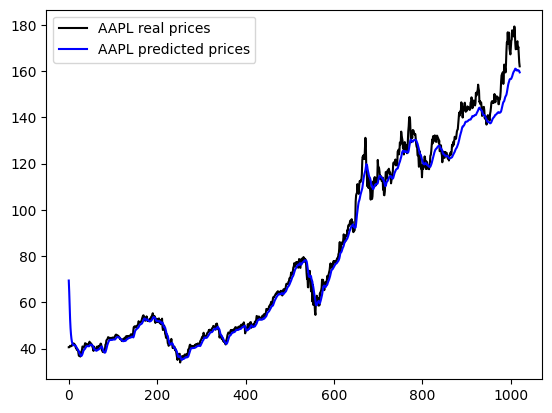

In [32]:
plt.plot(actual_prices,color="black",label=f"{company} real prices")
plt.plot(predicted_prices,color="blue",label=f"{company} predicted prices")
plt.legend()
plt.show()

In [33]:
rentability = 1
for i in range(1,len(actual_prices)):
  if predicted_prices[i] > actual_prices[i-1]:
    rentability*= actual_prices[i]/actual_prices[i-1]

print((rentability-1)*100,"%")

92.2595874525035 %
